#TASK #1: UNDERSTAND THE PROBLEM STATEMENT & BUSINESS CASE

![alt text](https://drive.google.com/uc?id=1U3eRNUYyza1A7EFopacJyujR87Vm_ae8)


![alt text](https://drive.google.com/uc?id=139zlnLGzYen-GbcnkXQZs44tf7OqV8e4)

#TASK #2: IMPORT DATASETS AND LIBRARIES


In [2]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [3]:
# Read stock prices data
stocks = pd.read_csv('stock.csv')
stocks.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [4]:
# Read the stocks volume data
volume = pd.read_csv('stock_volume.csv')
volume

Date      AAPL        BA         T       MGM     AMZN      IBM  \
0     2012-01-12  53146800   3934500  26511100  17891100  5385800  6881000   
1     2012-01-13  56505400   4641100  22096800  16621800  4753500  5279200   
2     2012-01-17  60724300   3700100  23500200  15480800  5644500  6003400   
3     2012-01-18  69197800   4189500  22015000  18387600  7473500  4600600   
4     2012-01-19  65434600   5397300  25524000  14022900  7096000  8567200   
...          ...       ...       ...       ...       ...      ...      ...   
2154  2020-08-05  30498000  46551000  22991700  18914200  3930000  3675400   
2155  2020-08-06  50607200  32921600  21908700  35867700  3940600  3417100   
2156  2020-08-07  49453300  19301600  30398500  34530300  3929600  3651000   
2157  2020-08-10  53100900  35857700  35514400  71219700  3167300  3968300   
2158  2020-08-11  46871100  60966900  30978300  34357900  3706600  4998500   

         TSLA      GOOG       sp500  
0      729300   3764400  4019890000  
1     5500400   4631800  3692370000  
2     4651600   3832800  4010490000  
3     1260200   5544000  4096160000  
4     1246300  12657800  4465890000  
...       ...       ...         ...  
2154  4978000   1979500  4732220000  
2155  5992300   1995400  4267490000  
2156  8883500   1576600  4104860000  
2157  7522300   1289300  4318570000  
2158  8356000   1452000  5087650000  

[2159 rows x 10 columns]

In [8]:
# Sort the data based on Date
stocks = stocks.sort_values(by = 'Date')

In [7]:
# Sort the volume data based on Date
volume = volume.sort_values(by = 'Date')

In [10]:
# Check if Null values exist in stock prices data
stocks.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [11]:
# Check if Null values exist in stocks volume data
volume.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [12]:
# Get stock prices dataframe info
stocks.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 265.5+ KB


In [13]:
# Get stock volume dataframe info
volume.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2159 non-null   object
 1   AAPL    2159 non-null   int64 
 2   BA      2159 non-null   int64 
 3   T       2159 non-null   int64 
 4   MGM     2159 non-null   int64 
 5   AMZN    2159 non-null   int64 
 6   IBM     2159 non-null   int64 
 7   TSLA    2159 non-null   int64 
 8   GOOG    2159 non-null   int64 
 9   sp500   2159 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 265.5+ KB


In [14]:
stocks.describe()

AAPL           BA            T          MGM         AMZN  \
count  2159.000000  2159.000000  2159.000000  2159.000000  2159.000000   
mean    140.819823   189.942700    35.162899    23.105743   915.665665   
std      70.827601   103.678586     3.207490     6.963847   697.838905   
min      55.790001    67.239998    26.770000     7.140000   175.929993   
25%      89.165714   124.015000    33.040001    18.545000   316.490005   
50%     116.599998   142.419998    34.930000    23.780001   676.010010   
75%     175.019997   297.044998    37.419998    28.430000  1593.645019   
max     455.609985   440.619995    43.470001    38.029999  3225.000000   

               IBM         TSLA         GOOG        sp500  
count  2159.000000  2159.000000  2159.000000  2159.000000  
mean    161.853001   259.600815   783.712512  2218.749554  
std      25.561938   210.988003   334.448057   537.321727  
min      94.769997    22.790001   278.481171  1278.040039  
25%     142.769997   184.595001   527.214416  1847.984985  
50%     156.949997   231.960007   737.599976  2106.629883  
75%     185.974998   307.350006  1079.744995  2705.810059  
max     215.800003  1643.000000  1568.489990  3386.149902

In [15]:
volume.describe()

AAPL            BA             T           MGM          AMZN  \
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03   
mean   5.820332e+07  6.419916e+06  2.832131e+07  9.845582e+06  4.102673e+06   
std    4.568141e+07  9.711873e+06  1.428911e+07  7.295753e+06  2.290722e+06   
min    1.136200e+07  7.889000e+05  6.862400e+06  9.507000e+05  8.813000e+05   
25%    2.769930e+07  3.031850e+06  2.002150e+07  5.796450e+06  2.675700e+06   
50%    4.209420e+07  3.991000e+06  2.485930e+07  7.899800e+06  3.494800e+06   
75%    7.182480e+07  5.325900e+06  3.210565e+07  1.104055e+07  4.768150e+06   
max    3.765300e+08  1.032128e+08  1.950827e+08  9.009820e+07  2.385610e+07   

                IBM          TSLA          GOOG         sp500  
count  2.159000e+03  2.159000e+03  2.159000e+03  2.159000e+03  
mean   4.453090e+06  7.001302e+06  2.498238e+06  3.680732e+09  
std    2.462811e+06  5.781208e+06  1.928407e+06  8.622717e+08  
min    1.193000e+06  3.649000e+05  7.900000e+03  1.248960e+09  
25%    3.111250e+06  3.433450e+06  1.325400e+06  3.211890e+09  
50%    3.825000e+06  5.581100e+06  1.813900e+06  3.526890e+09  
75%    4.937300e+06  8.619550e+06  3.245350e+06  3.933290e+09  
max    3.049020e+07  6.093880e+07  2.497790e+07  9.044690e+09

In [ ]:
# Why S&P500 is the most traded of all? Check out this article: 
# https://www.investopedia.com/articles/personal-finance/022216/put-10000-sp-500-etf-and-wait-20-years.asp

# Text from the article above:
# "The S&P 500 index is a broad-based measure of large corporations traded on U.S. stock markets. Over long periods of time, 
# passively holding the index often produces better results than actively trading or picking single stocks.
# Over long-time horizons, the index typically produces better returns than actively managed portfolios."

#TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [16]:
# Function to normalize stock prices based on their initial price
def normalize(df):
    x = df.copy()
    for _ in x.columns[1:]:
       x[_]= x[_]/x[_][0] 
    return x

In [17]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df,title):
    fig = px.line(title = title)

    for e in df.columns[1:]:
        fig.add_scatter(x = df.Date ,y = df[e] ,name = e)
    
    fig.show()

In [18]:
# plot interactive chart for stocks data
interactive_plot(stocks,'Stock prices')

In [19]:
interactive_plot(volume,'Volume of stocks')

In [20]:
interactive_plot(normalize(stocks),'Normalized Stock prices')

In [21]:
interactive_plot(normalize(volume),'Normalized Volume of stocks')

In [ ]:
# As shown on the plot, S&P500 is by far the one traded with a more higher volume than all the others

# TASK #4: PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL

![alt text](https://drive.google.com/uc?id=1uXYYHfgeJyncu4BZRAooTC4iCclH9e9B)

In [26]:
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df,vol_df,name):
    return pd.DataFrame( {'Date':price_df.Date, 'Close':price_df[name], 'Volume':vol_df[name] } )


In [27]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 

def trading_window(data):
     n = 1
     data['Target'] = data[['Close']].shift(-n)
     return data

In [28]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stocks,volume,'AAPL')
price_volume_df

Date       Close    Volume
0     2012-01-12   60.198570  53146800
1     2012-01-13   59.972858  56505400
2     2012-01-17   60.671429  60724300
3     2012-01-18   61.301430  69197800
4     2012-01-19   61.107143  65434600
...          ...         ...       ...
2154  2020-08-05  440.250000  30498000
2155  2020-08-06  455.609985  50607200
2156  2020-08-07  444.450012  49453300
2157  2020-08-10  450.910004  53100900
2158  2020-08-11  437.500000  46871100

[2159 rows x 3 columns]

In [29]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

Date       Close    Volume      Target
0     2012-01-12   60.198570  53146800   59.972858
1     2012-01-13   59.972858  56505400   60.671429
2     2012-01-17   60.671429  60724300   61.301430
3     2012-01-18   61.301430  69197800   61.107143
4     2012-01-19   61.107143  65434600   60.042858
...          ...         ...       ...         ...
2154  2020-08-05  440.250000  30498000  455.609985
2155  2020-08-06  455.609985  50607200  444.450012
2156  2020-08-07  444.450012  49453300  450.910004
2157  2020-08-10  450.910004  53100900  437.500000
2158  2020-08-11  437.500000  46871100         NaN

[2159 rows x 4 columns]

In [30]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

Date       Close    Volume      Target
0     2012-01-12   60.198570  53146800   59.972858
1     2012-01-13   59.972858  56505400   60.671429
2     2012-01-17   60.671429  60724300   61.301430
3     2012-01-18   61.301430  69197800   61.107143
4     2012-01-19   61.107143  65434600   60.042858
...          ...         ...       ...         ...
2153  2020-08-04  438.660004  43267900  440.250000
2154  2020-08-05  440.250000  30498000  455.609985
2155  2020-08-06  455.609985  50607200  444.450012
2156  2020-08-07  444.450012  49453300  450.910004
2157  2020-08-10  450.910004  53100900  437.500000

[2158 rows x 4 columns]

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns= ['Date']))
price_volume_target_scaled_df

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [32]:
price_volume_target_scaled_df.shape

(2158, 3)

In [33]:
# Create Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [34]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
X.shape

(2158, 2)

In [35]:
y.shape

(2158, 1)

In [37]:
split = int(0.65 * len(X))

In [38]:
X_train = X[:split]
X_train.shape

(1402, 2)

In [39]:
y_train = y[:split]

In [40]:
X_test = X[split:]
y_test = y[split:]

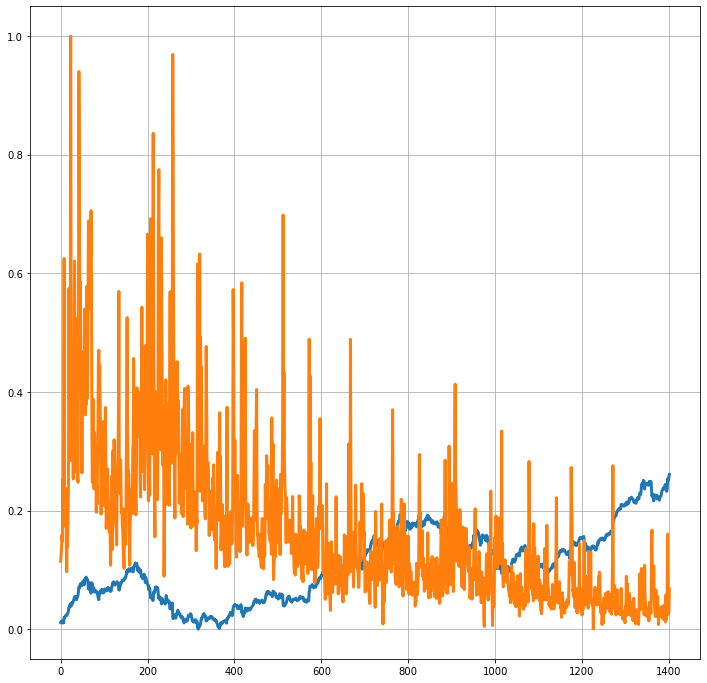

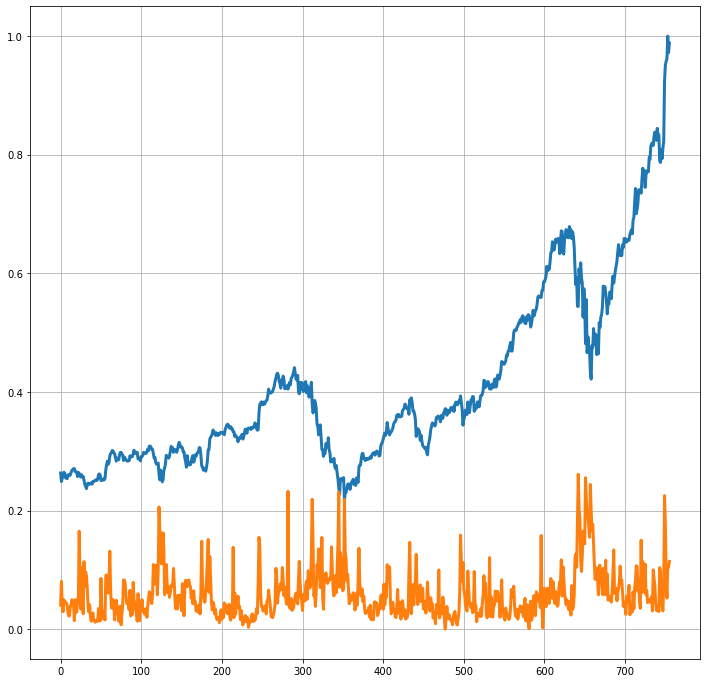

In [41]:
# Define a data plotting function

def show_plot(data, title):
    plt.figure(figsize=(12,12))
    plt.plot(data, linewidth = 3)
    plt.title = title
    plt.grid()

show_plot(X_train,'Training Data')    
show_plot(X_test,'Test Data')  

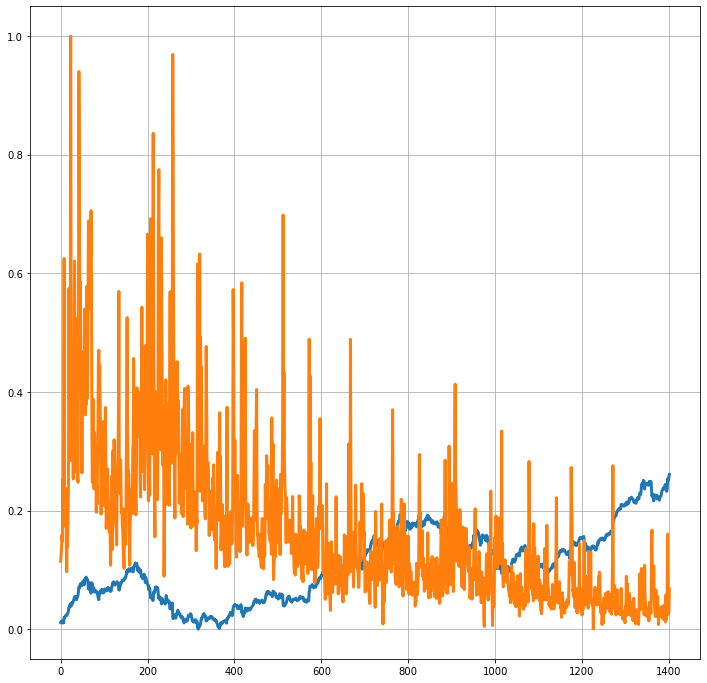

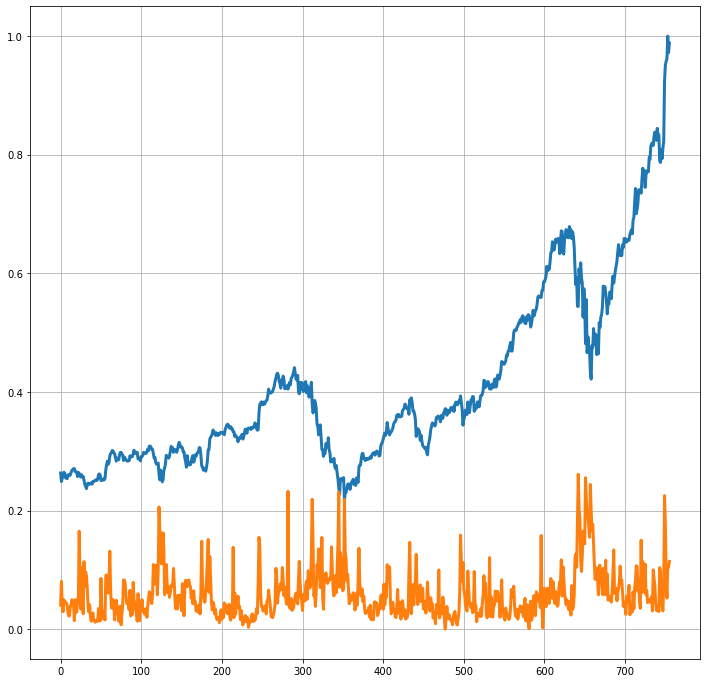

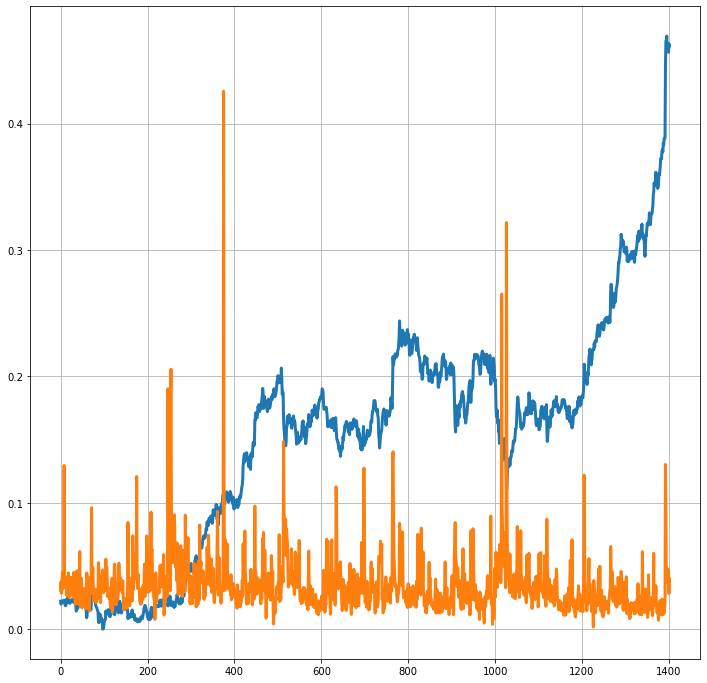

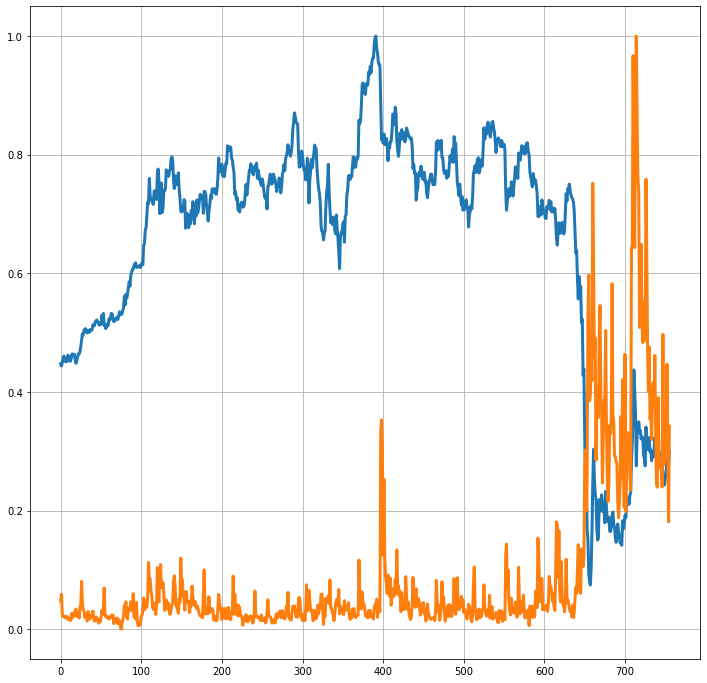

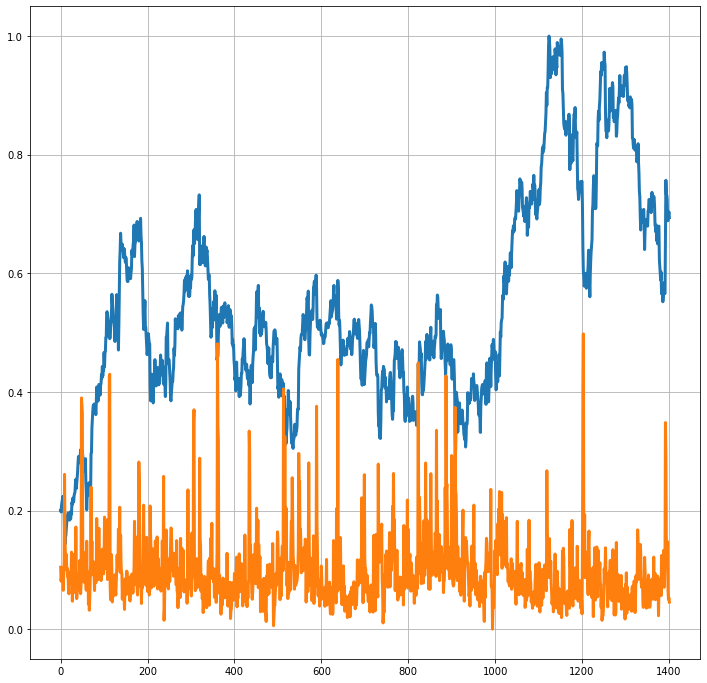

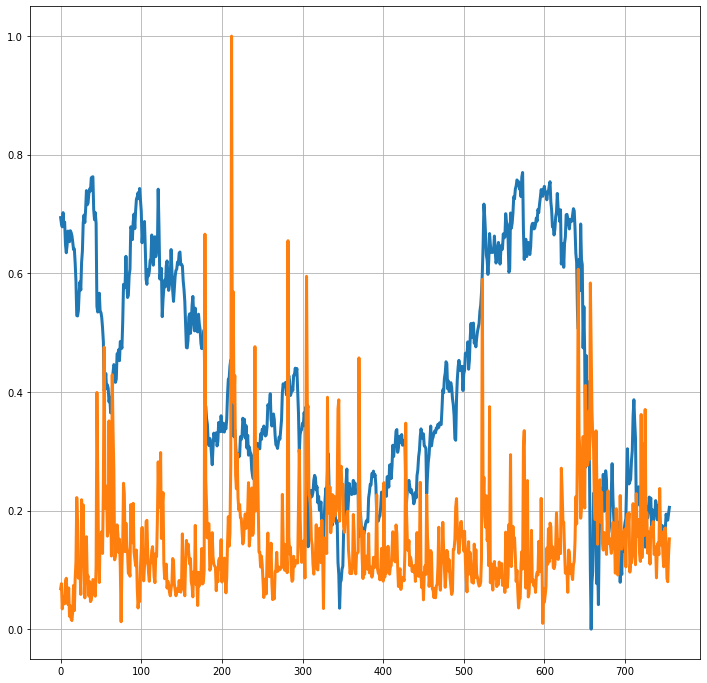

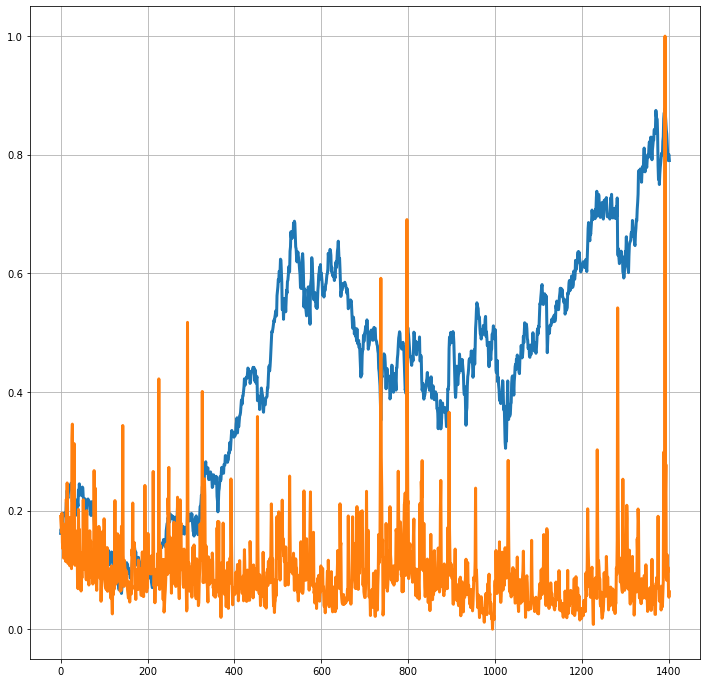

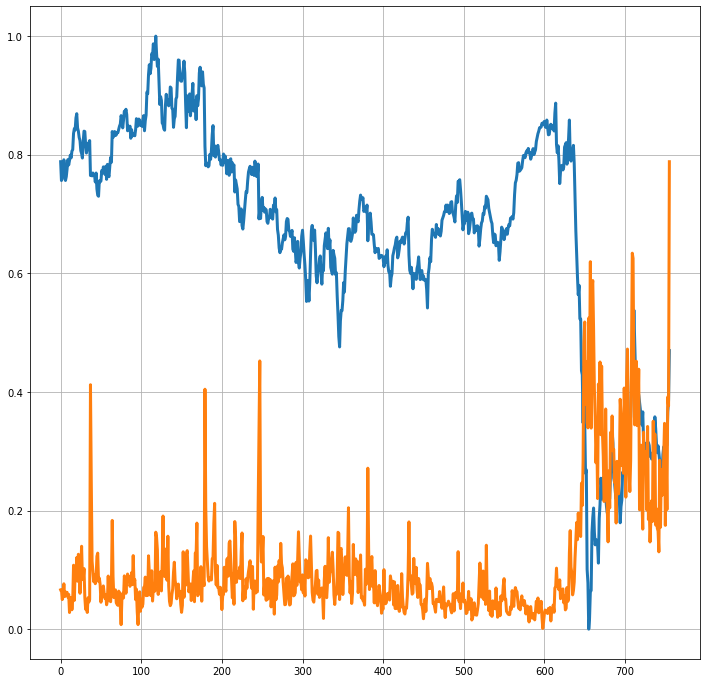

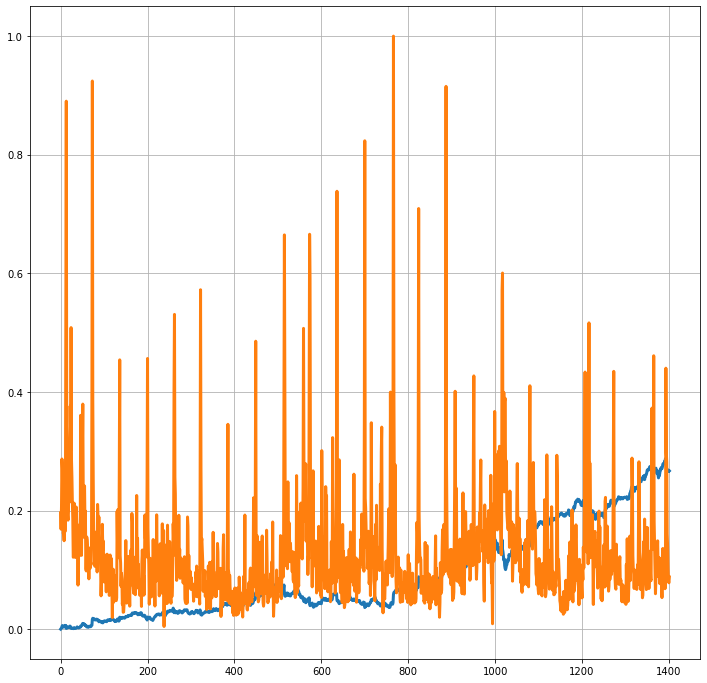

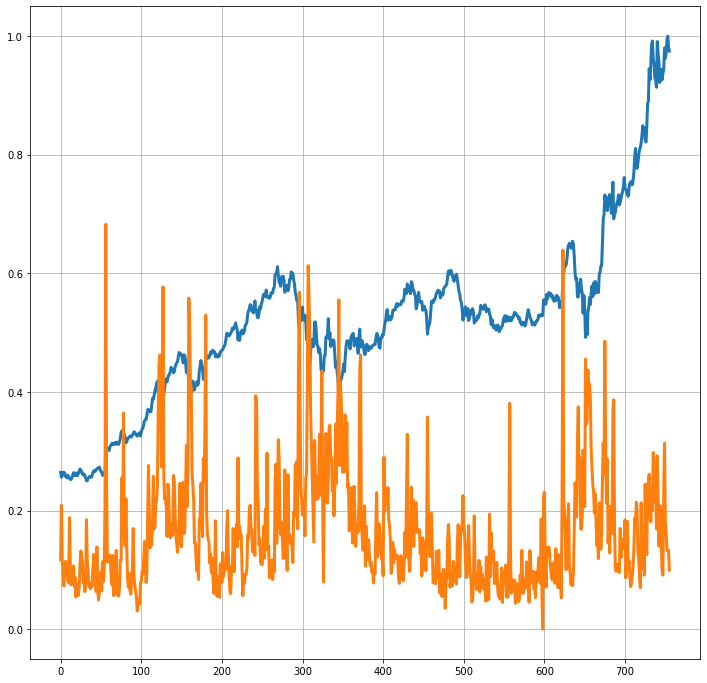

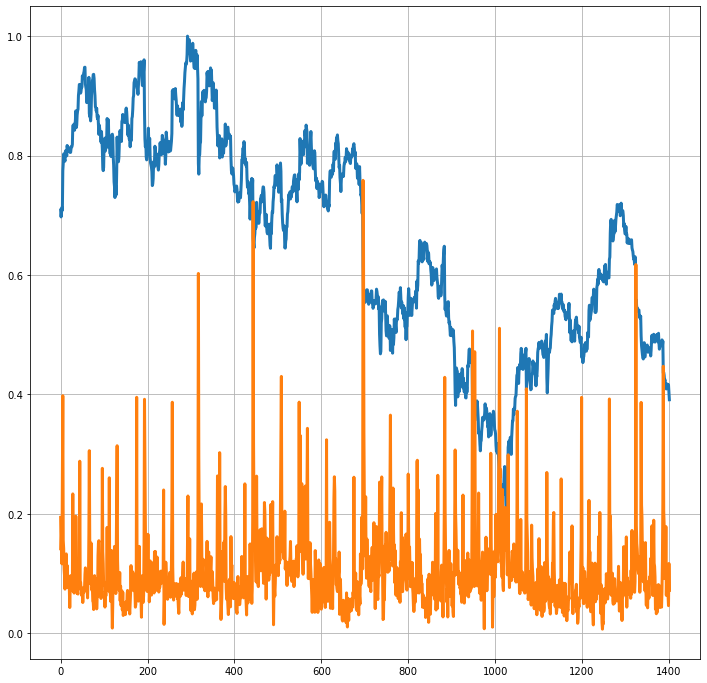

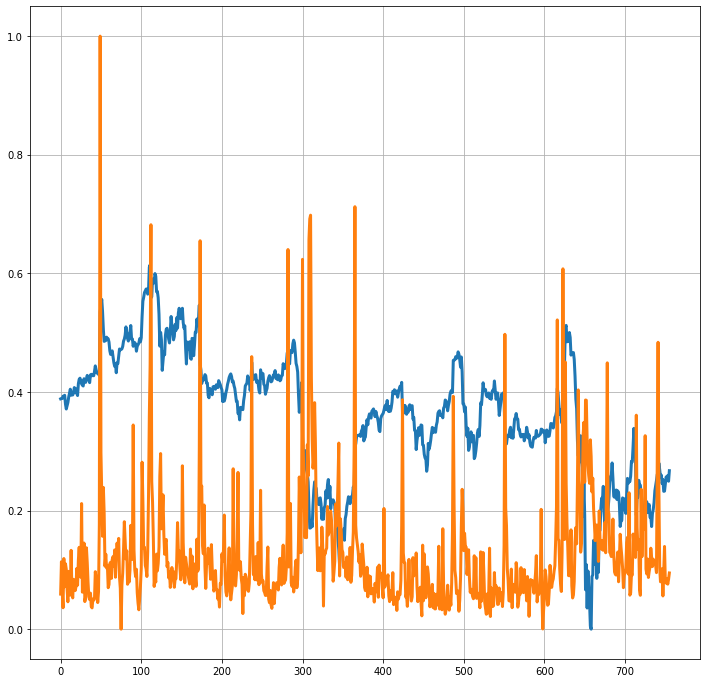

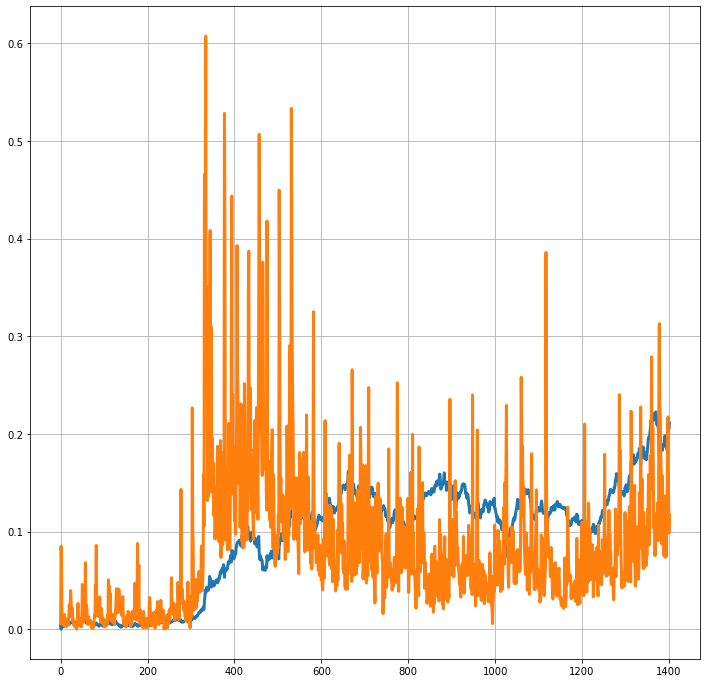

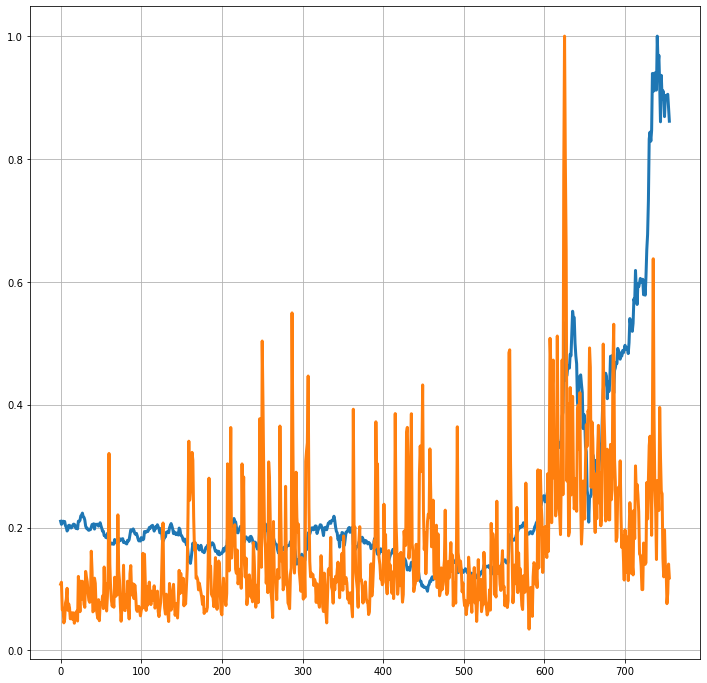

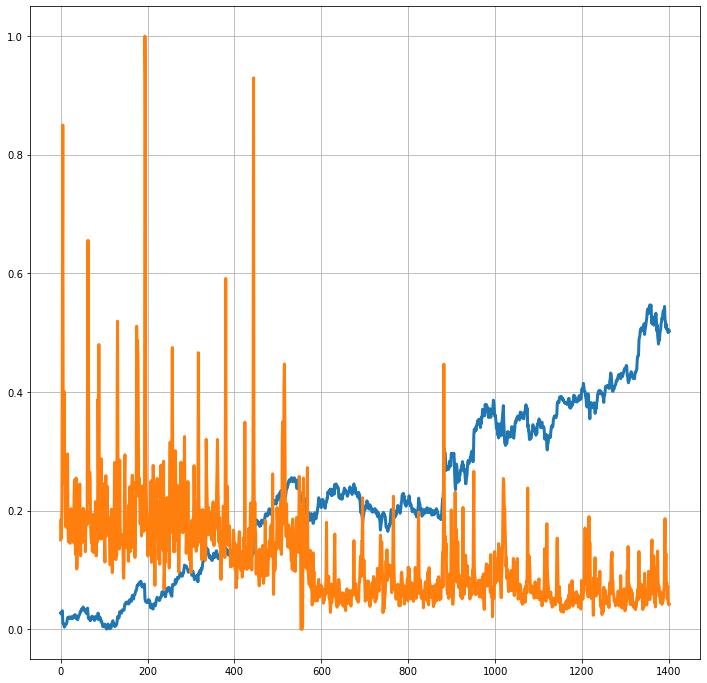

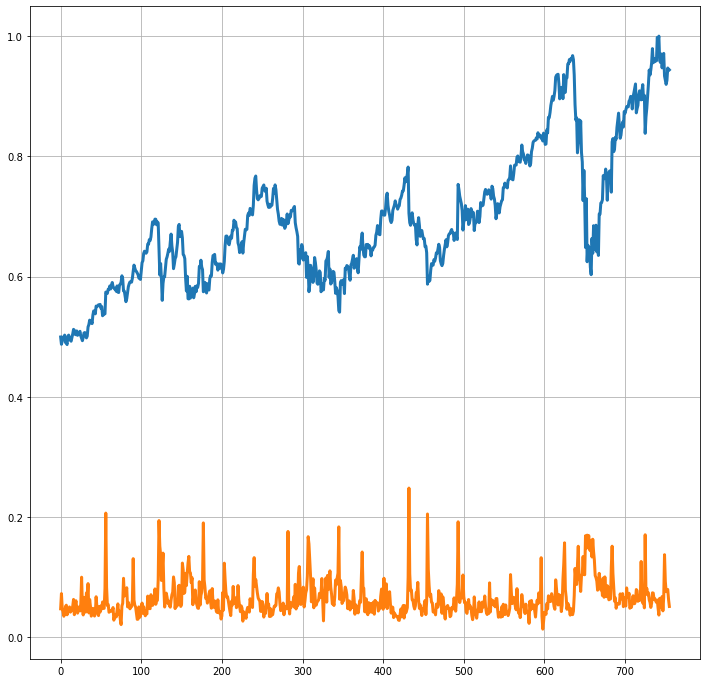

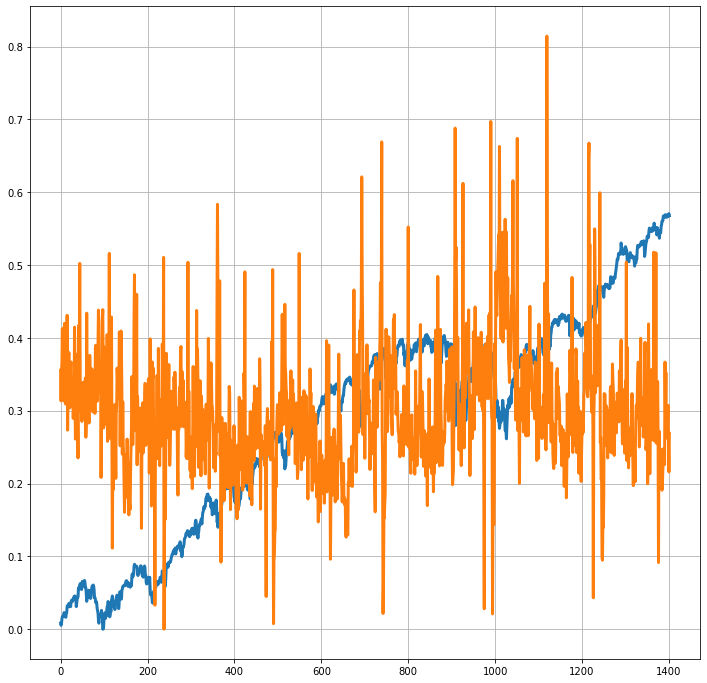

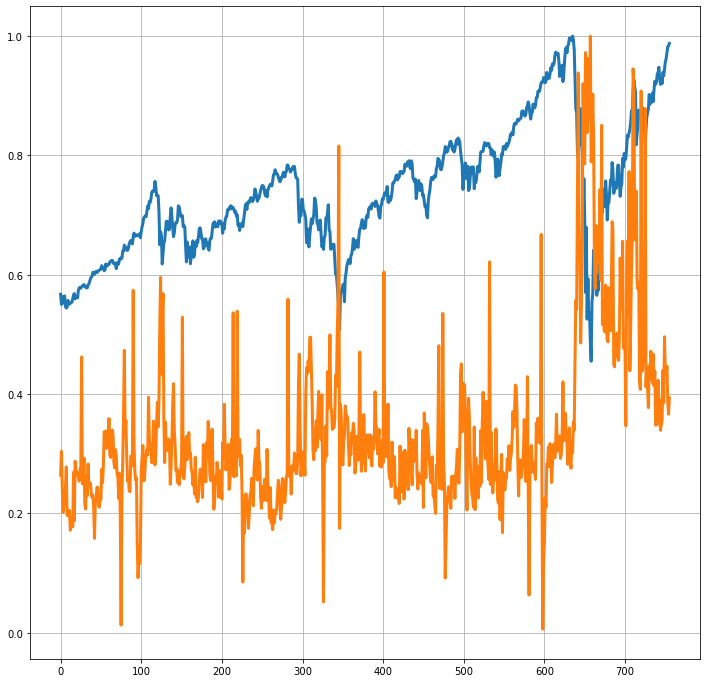

In [43]:
for i in stocks.columns[1:]:
    price_volume_df = individual_stock(stocks,volume,i)
    price_volume_target_df = trading_window(price_volume_df)
    price_volume_target_df = price_volume_target_df[:-1]
    sc = MinMaxScaler(feature_range = (0,1))
    price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns= ['Date']))
    X = price_volume_target_scaled_df[:,:2]
    y = price_volume_target_scaled_df[:,2:]
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    show_plot(X_train,'Training Data of {}'.format(i))    
    show_plot(X_test,'Test Data of {}'.format(i)) 

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND REGRESSION 

![alt text](https://drive.google.com/uc?id=1wJHaXRzsqMi713Qkzo2IQgZTmsDxU8f7)

![alt text](https://drive.google.com/uc?id=1vDuV9M1b6KF5yIvWpiUqhI7zSr7CKk5g)

![alt text](https://drive.google.com/uc?id=1H-wED3vnYj3ZpsvK0dOEPwYGVjSVhpfI)

![alt text](https://drive.google.com/uc?id=1KM0yvHp1DjVZ87uf68yJdqj2Sh_oTLLT)

# TASK #6: UNDERSTAND THE CONCEPT OF REGULARIZATION & RIDGE REGRESSION

![alt text](https://drive.google.com/uc?id=1m9NX1aEDLAW2QCqeiQMYggnY3ovVW8QO)

![alt text](https://drive.google.com/uc?id=13Wn7UkxVkbRlIiJ-rZIrqAItfumj_wzi)

![alt text](https://drive.google.com/uc?id=1WB1wdMUYqDNAhCytmk889w9SVQQVrwlt)

![alt text](https://drive.google.com/uc?id=1IsQLtMZbKMyITX_FVr50ZkB68uUuQwmB)

![alt text](https://drive.google.com/uc?id=1D37GCrEMLdFwjTQL9WIoPEsLlEyITuX5)

![alt text](https://drive.google.com/uc?id=1IBz73HFZPUD6wTEoerXGFTJKhhZyAyb9)

# TASK #7: BUILD AND TRAIN A RIDGE LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model


In [ ]:
# Test the model and calculate its accuracy 


In [ ]:
# Make Prediction


In [ ]:
# Append the predicted values into a list


In [ ]:
# Append the close values to the list



In [ ]:
# Create a dataframe based on the dates in the individual stock data


In [ ]:
# Add the close values to the dataframe


In [ ]:
# Add the predicted values to the dataframe


In [ ]:
# Plot the results


**MINI CHALLENGE #4:**
- **Experiment with various regularization values for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**


# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1U2auh7KSalF4qc8iWFScawEB3TniFeXw)

![alt text](https://drive.google.com/uc?id=1xsy74Dj9JyuvwcPzmQcwN9hzHGevAvKB)

![alt text](https://drive.google.com/uc?id=1b2wIRl63jXgyoh_w1ysxk3XvTJ5j8864)

# TASK #9: UNDERSTAND HOW DO ARTFICIAL NEURAL NETWORKS TRAIN 

![alt text](https://drive.google.com/uc?id=1pg1rxBoHDtRNVNN0TyMvnCMVKw9ni5pN)

![alt text](https://drive.google.com/uc?id=1wc4NOBLC55Hb2s8s_hLI2LWykV4WmLwU)

![alt text](https://drive.google.com/uc?id=1zI3MbDUAws-gpPisqDrVL8BoupWRO6KJ)

![alt text](https://drive.google.com/uc?id=1twCXUdFtdFMGsicoQOWI0a9RiHMZ9MK_)

# TASK #10: UNDERSTAND THE THEORY AND INTUITION BEHIND RECURRENT NEURAL NETWORKS

![alt text](https://drive.google.com/uc?id=1a6w38XX_W2Zcsvde5FDepUax1aRyvnBT)

![alt text](https://drive.google.com/uc?id=1tc1SRSaFp-zuvujAQY66E_JEoY6doI0m)

![alt text](https://drive.google.com/uc?id=10xmgZjv2IjaY4xFm81rwgKqOC0119tug)

![alt text](https://drive.google.com/uc?id=1CwBOagYD82QaayeGDndRjb_Irm5HIwBs)

![alt text](https://drive.google.com/uc?id=148mslyqerZ_gLzQIkPFiDsewCO5nMNK7)

![alt text](https://drive.google.com/uc?id=1_Ky5ek9gq_Ov6VLTkXFmmzEhvjo91tpB)

# TASK #11: UNDERSTAND THE THEORY AND INTUITION BEHIND LONG SHORT TERM MEMORY NETWORKS

![alt text](https://drive.google.com/uc?id=1cd3jZpTuSzsPjMps6SRFqvXNfs4jA_vu)

![alt text](https://drive.google.com/uc?id=1URS5Ny54g-c3ookAL1FLn28TYFlbDIdG)

![alt text](https://drive.google.com/uc?id=1Cm3Unnn_b71rfklW_ejm50xYOYkXh8cl)

![alt text](https://drive.google.com/uc?id=1pU8lbF965n38ZspjIFsEAU3CEjpclpfd)

![alt text](https://drive.google.com/uc?id=1zSqTnPZDfiz6qRgMHaFB9wpB55Fnzwf4)

# TASK #12: TRAIN AN LSTM TIME SERIES MODEL

In [ ]:
# Let's test the functions and get individual stock prices and volumes for AAPL


In [ ]:
# Get the close and volume data as training data (Input)


In [ ]:
# Normalize the data


In [ ]:
# Create the training and testing data, training data contains present day and previous day values


In [ ]:
# Convert the data into array format


In [ ]:
# Split the data


In [ ]:
# Reshape the 1D arrays to 3D arrays to feed in the model


In [ ]:
# Create the model


In [ ]:
# Train the model


In [ ]:
# Make prediction


**MINI CHALLENGE #5:**
- **Test the pipeline with at least 3 other stocks** 
- **Experiment with various LSTM model parameters (Ex: Use 150 units instead of 50), print out the model summary and retrain the model**


# **EXCELLENT JOB! YOU SHOULD BE TRULY PROUD WITH THE NEWLY ACQUIRED SKILLS**

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**
- **What is the average trading volume for Apple stock?**
- **What is the maximum trading volume for sp500?**
- **Which security is traded the most? comment on your answer**
- **What is the average stock price of the S&P500 over the specified time period?**
- **What is the maximum price of Tesla Stock?**

In [ ]:
# Get the statistical data for the stocks volume dataframe
# Average trading volume for Apple stock is 2.498238e+06	
# Average trading volume for S&P500 is 3.680732e+09

# Why S&P500 is the most traded of all? Check out this article: 
# https://www.investopedia.com/articles/personal-finance/022216/put-10000-sp-500-etf-and-wait-20-years.asp

# Text from the article above:
# "The S&P 500 index is a broad-based measure of large corporations traded on U.S. stock markets. Over long periods of time, 
# passively holding the index often produces better results than actively trading or picking single stocks.
# Over long-time horizons, the index typically produces better returns than actively managed portfolios."

stock_vol_df.describe()

In [ ]:
# Get the statistical data for the prices dataframe
stock_price_df.describe()

In [ ]:
# Average price for S&P500 = 2218.749554
# Maximum Tesla Price = 1643.000000

**MINI CHALLENGE #2 SOLUTION:**
- **Plot the normalized stock prices and volume dataset.**

In [ ]:
# Plot interactive chart for volume data
# Notice that S&P500 trading is orders of magnitude compared to individual stocks
interactive_plot(stock_vol_df, 'Stocks Volume')

In [ ]:
# plot interactive chart for normalized stocks prices data
interactive_plot(normalize(stock_price_df), 'Stock Prices')

# Let's normalize the data and re-plot interactive chart for volume data
interactive_plot(normalize(stock_vol_df), 'Normalized Volume')

**MINI CHALLENGE #3 SOLUTION:**
- **Test the pipeline with S&P500 and AMZN datasets instead of AAPL**

In [ ]:
# Let's test the functions and get individual stock prices and volumes for S&P500
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'sp500')
price_volume_df

# Let's test the functions and get individual stock prices and volumes for Amazon 
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'AMZN')
price_volume_df

**MINI CHALLENGE #4 SOLUTION:**
- **Experiment with various regularization value for alpha** 
- **What is the impact of increasing alpha?**
- **Note: default value for alpha is = 1**

In [ ]:
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge(alpha = 2)
regression_model.fit(X_train, y_train)

**MINI CHALLENGE #5 SOLUTION:**
- **Test the pipeline with at least 3 other stocks** 
- **Experiment with various LSTM model parameters (Ex: Use 150 units instead of 50), print out the model summary and retrain the model**



In [ ]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()